In [2]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(r"C:\Users\jonat\Downloads\CleanedFireIncidentData (1).csv")
data

,Unnamed: 0,Borough,Borough num,Time,Time num,Alarm Source,Alarm Source num,Incident Classification,Incident Classification num,Engines Assigned,Ladders Assigned,Other Units Assigned,Valid Response Time
0,0,RICHMOND / STATEN ISLAND,0.840686,10 PM - 2 AM,0.806630,Phone,0.957765,NonMedical Emergencies,0.946594,1.0,1.0,0.0,1
1,1,BRONX,0.791903,10 PM - 2 AM,0.806821,PD Link/Medical,0.686953,Medical MFAs,0.871638,1.0,0.0,0.0,1
2,2,BROOKLYN,0.831623,10 PM - 2 AM,0.806821,PD Link/Medical,0.686953,Medical Emergencies,0.640499,1.0,0.0,0.0,1
3,3,QUEENS,0.819562,10 PM - 2 AM,0.806630,Phone,0.957765,NonMedical MFAs,0.948750,3.0,2.0,1.0,1
4,4,QUEENS,0.819512,10 PM - 2 AM,0.806810,Private Fire Alarm,0.985822,NonMedical Emergencies,0.946592,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
933453,933509,BRONX,0.791872,2 PM - 6 PM,0.811853,Phone,0.957828,NonMedical MFAs,0.948728,2.0,2.0,1.0,1
933454,933510,MANHATTAN,0.766783,2 PM - 6 PM,0.811837,Private Fire Alarm,0.985768,NonMedical Emergencies,0.946587,3.0,2.0,1.0,1
933455,933511,BRONX,0.791846,2 PM - 6 PM,0.811811,PD Link/Medical,0.686823,Medical Emergencies,0.640453,1.0,0.0,0.0,1
933456,933512,MANHATTAN,0.766942,2 PM - 6 PM,0.811853,EMS Link/Medical,0.670706,Medical Emergencies,0.640409,1.0,0.0,0.0,1


In [4]:
data_columns = data[['Borough num', 'Alarm Source num', 
       'Incident Classification num', 'Engines Assigned',
       'Ladders Assigned', 'Other Units Assigned', 'Time num']]

X = data_columns
y = data['Valid Response Time']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [6]:
# Decision Tree Classification Model

dt = DecisionTreeClassifier(random_state=42)

In [7]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}" )

Decision Tree Accuracy: 0.8616169948364151


In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[  1609  24750]
 [  1085 159248]]


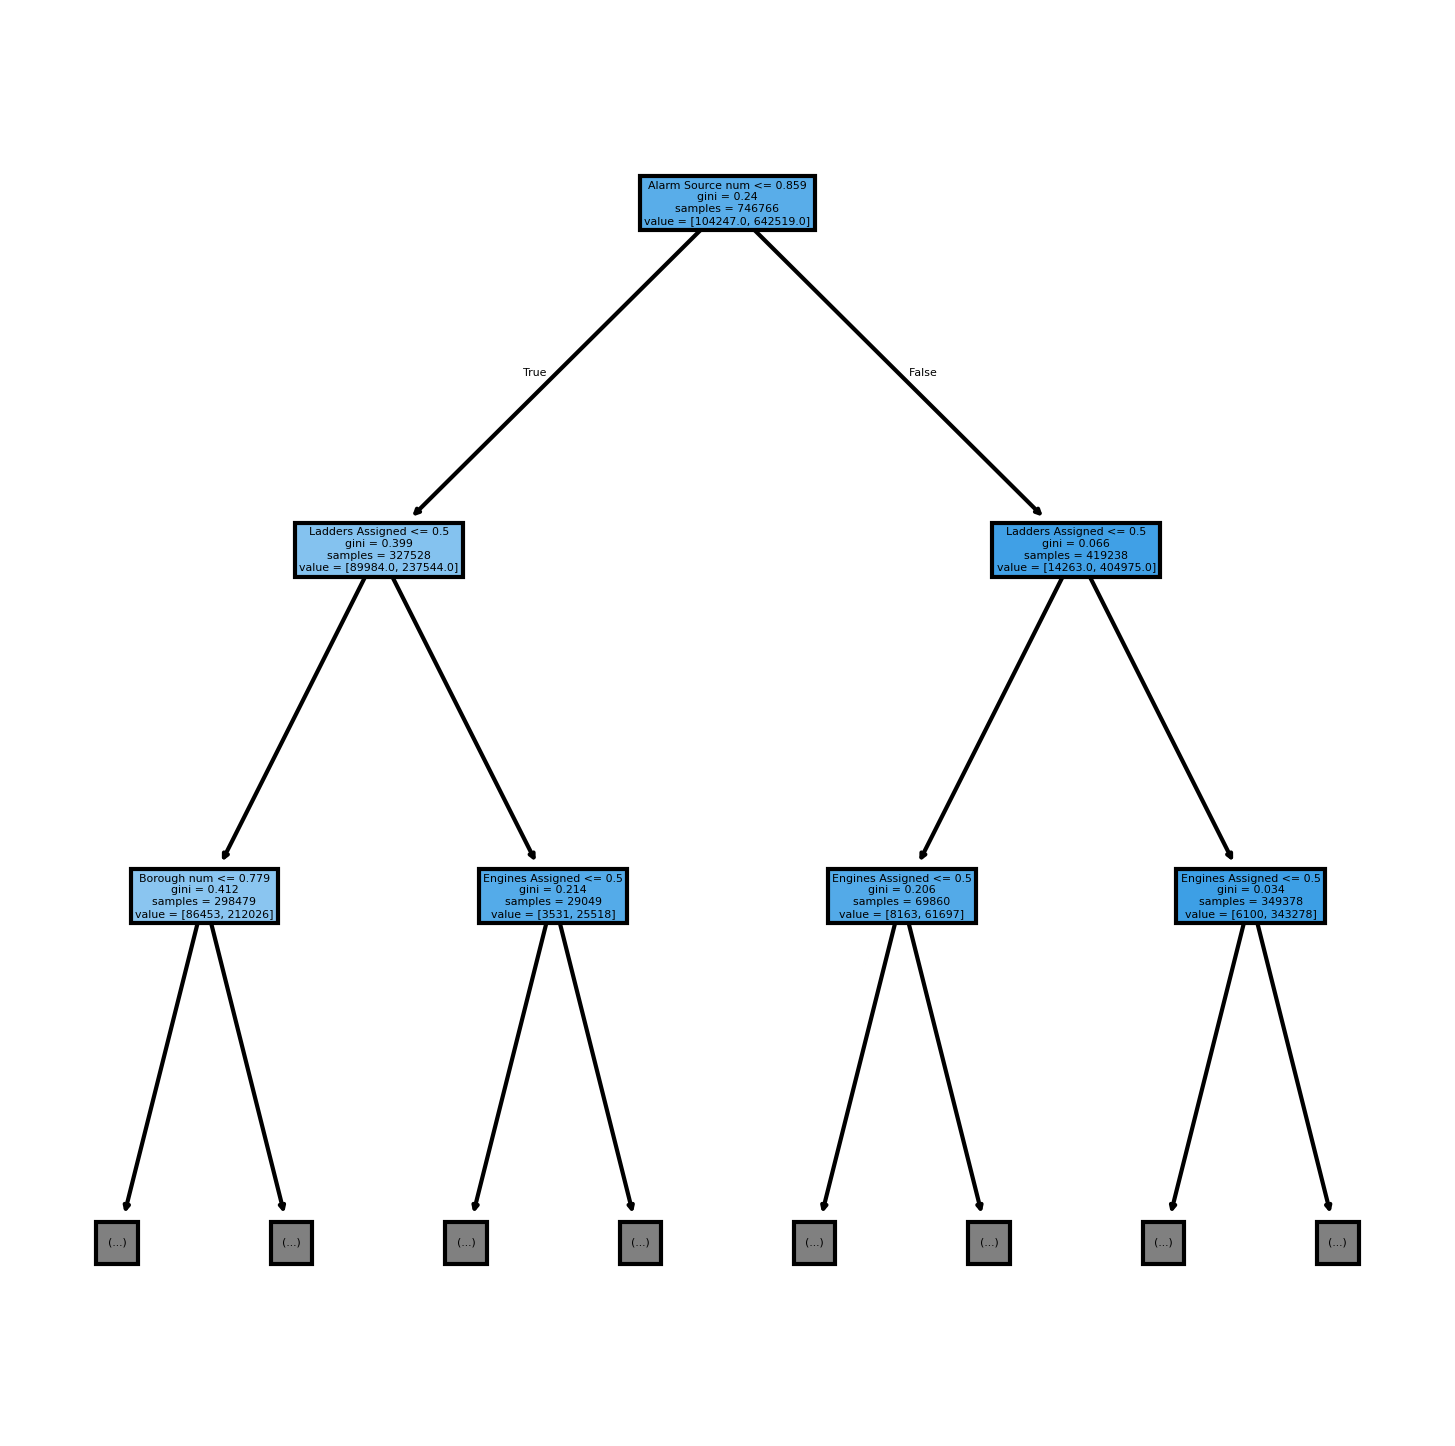

In [10]:
# Plot out tree
# Use feature-importance to test variables
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6), dpi = 300)
tree.plot_tree(dt, max_depth = 2, feature_names = X.columns, filled = True)
plt.show()

In [11]:
fi1 = dt.feature_importances_
fi1 = pd.Series(data = fi1, index = X.columns)
fi1.sort_values(ascending = False, inplace = True)

C:\Users\Jason\AppData\Local\Temp\ipykernel_22284\1443521375.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")


<function matplotlib.pyplot.show(close=None, block=None)>

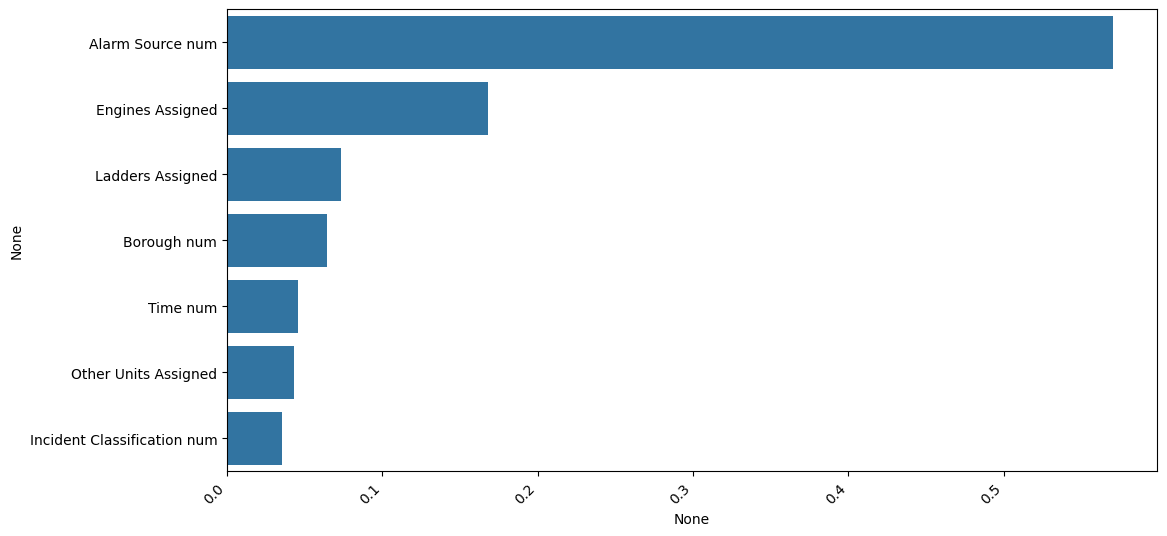

In [12]:
plt.figure(figsize = (12,6))
chart = sns.barplot(x = fi1, y = fi1.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.show

In [13]:
# Random Forest Classifier

rf = RandomForestClassifier(n_estimators= 10, random_state=42)

In [14]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [15]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}" )

Random Forest Accuracy: 0.8637327791228333


In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[  1544  24815]
 [   625 159708]]


C:\Users\Jason\AppData\Local\Temp\ipykernel_22284\2139645486.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")


<function matplotlib.pyplot.show(close=None, block=None)>

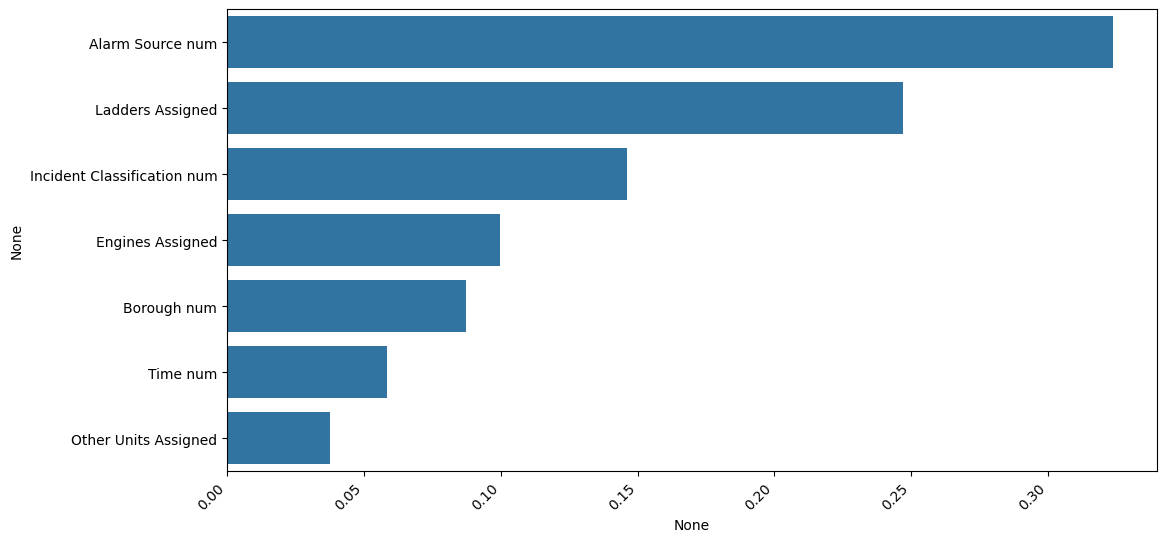

In [17]:
fi2 = rf.feature_importances_
fi2 = pd.Series(data = fi2, index = X.columns)
fi2.sort_values(ascending = False, inplace = True)

plt.figure(figsize = (12,6))
chart = sns.barplot(x = fi2, y = fi2.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.show

In [18]:
# Gradient-Boosting Classification

gb = GradientBoostingClassifier(n_estimators=10, learning_rate= 0.05, random_state=42, max_features=6)

In [19]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=6, n_estimators=10,
                           random_state=42)

In [20]:
y_pred = gb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient-Boosting Accuracy: {accuracy}')

Gradient-Boosting Accuracy: 0.858810232896964


In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[     0  26359]
 [     0 160333]]


C:\Users\Jason\AppData\Local\Temp\ipykernel_22284\1313124604.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")


<function matplotlib.pyplot.show(close=None, block=None)>

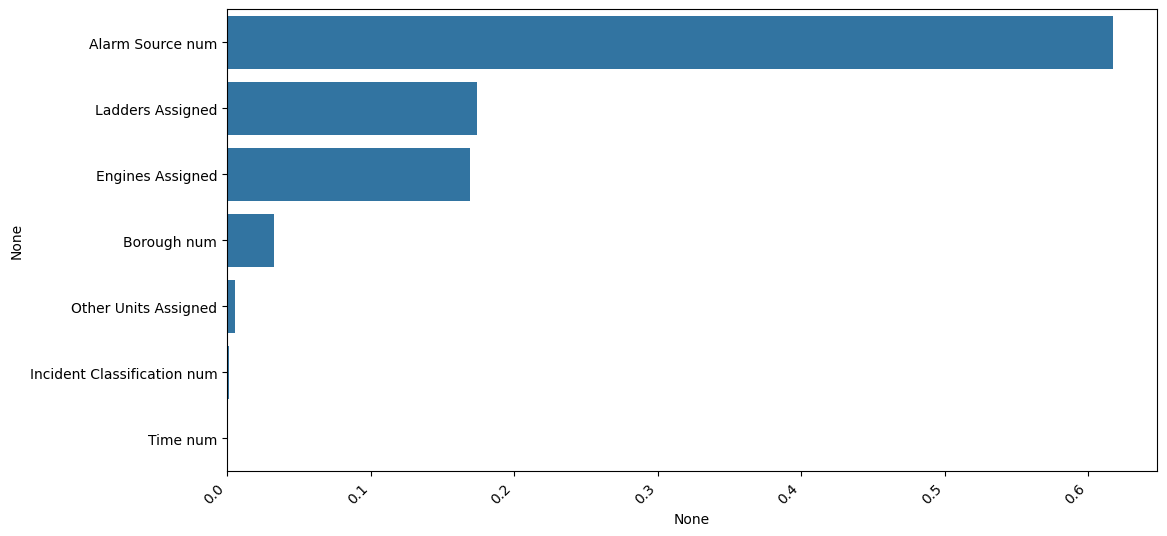

In [22]:
fi3 = gb.feature_importances_
fi3 = pd.Series(data = fi3, index = X.columns)
fi3.sort_values(ascending = False, inplace = True)

plt.figure(figsize = (12,6))
chart = sns.barplot(x = fi3, y = fi3.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.show

In [23]:
#ADA Boost Classifier

ada = AdaBoostClassifier(random_state=42, n_estimators=10)

In [24]:
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=10, random_state=42)

In [25]:
y_pred = ada.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'ADA Boost Accuracy: {accuracy}')

ADA Boost Accuracy: 0.8597743877616609


In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[   430  25929]
 [   250 160083]]


C:\Users\Jason\AppData\Local\Temp\ipykernel_22284\1943739812.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")


<function matplotlib.pyplot.show(close=None, block=None)>

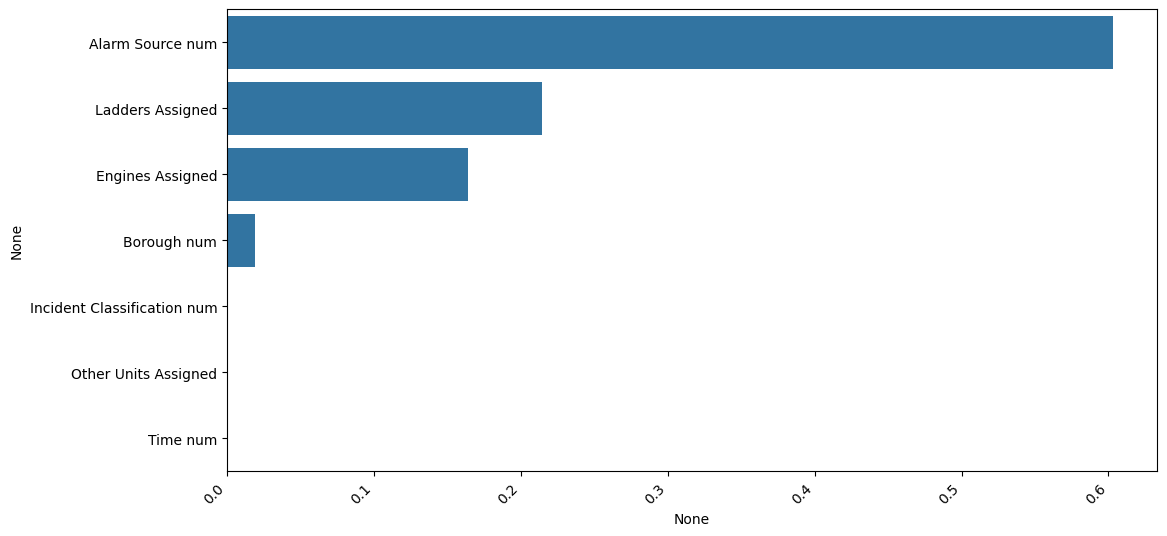

In [27]:
fi4 = ada.feature_importances_
fi4 = pd.Series(data = fi4, index = X.columns)
fi4.sort_values(ascending = False, inplace = True)

plt.figure(figsize = (12,6))
chart = sns.barplot(x = fi4, y = fi4.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.show

In [28]:
# Logistic Regression

lg = LogisticRegression()

In [29]:
lg.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = lg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.8592226769224177


In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[    78  26281]
 [     1 160332]]


In [32]:
print("fi1 shape (DT):", fi1.shape)
print("fi2 shape (RF):", fi2.shape)
print("fi3 shape (GB):", fi3.shape)
print("fi4 shape (Ada):", fi4.shape)

fi1 shape (DT): (7,)
fi2 shape (RF): (7,)
fi3 shape (GB): (7,)
fi4 shape (Ada): (7,)


In [33]:
# Average the feature importance values
total_importance = (fi1 + fi2 + fi3 + fi4) / 4

print(total_importance)

Alarm Source num               0.528501
Borough num                    0.050797
Engines Assigned               0.150240
Incident Classification num    0.045629
Ladders Assigned               0.177154
Other Units Assigned           0.021595
Time num                       0.026084
dtype: float64


C:\Users\Jason\AppData\Local\Temp\ipykernel_22284\3040604910.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")
C:\Users\Jason\AppData\Local\Temp\ipykernel_22284\3040604910.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_yticklabels(chart.get_yticklabels(), fontsize=15)


<function matplotlib.pyplot.show(close=None, block=None)>

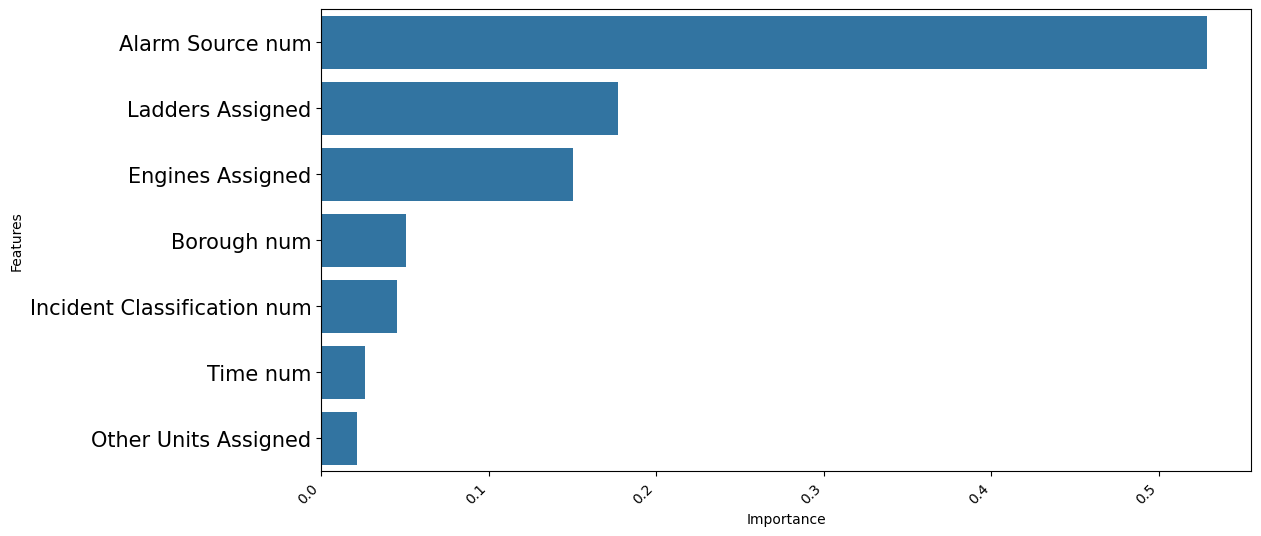

In [45]:
total_importance = pd.Series(data = total_importance, index = X.columns)
total_importance.sort_values(ascending = False, inplace = True)

plt.figure(figsize = (12,6))
chart = sns.barplot(x = total_importance, y = total_importance.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")
chart.set_ylabel('Features', fontsize=10)
chart.set_xlabel('Importance', fontsize=10)
chart.set_yticklabels(chart.get_yticklabels(), fontsize=15)
plt.show

In [ ]:
features = X.columns

importance_df = pd.DataFrame({
    'DecisionTree': fi1,
    'RandomForest': fi2,
    'GradientBoosting': fi3,
    'AdaBoost': fi4,
})

importance_df

,DecisionTree,RandomForest,GradientBoosting,AdaBoost
Alarm Source num,0.634688,0.395810,0.643469,0.4
Borough num,0.063396,0.068861,0.052501,0.1
Engines Assigned,0.098588,0.088820,0.088894,0.1
Incident Classification num,0.026341,0.165543,0.117255,0.1
Ladders Assigned,0.095789,0.216882,0.097406,0.3
Other Units Assigned,0.058735,0.035338,0.000474,0.0
Time num,0.022464,0.028745,0.000000,0.0


In [ ]:
# Printing the important features

alarm_source_val = data.groupby('Alarm Source')['Alarm Source num'].mean().reset_index()
alarm_source_val.sort_values(['Alarm Source num'], ascending=True, inplace=True)
alarm_source_val

,Alarm Source,Alarm Source num
4,EMS Link/Medical,0.670871
8,PD Link/Medical,0.686978
14,Verbal,0.801265
13,VERBAL,0.816113
0,911,0.824593
5,EMS-911,0.856437
3,EMS,0.868775
7,ERS No Contact,0.933494
6,ERS,0.945782
9,PHONE,0.955027


Based off this table, we need to focus on improving EMS Link/Medical alarm systems and PD Link/Medical alarm systems

In [ ]:
incident_classification_val = data.groupby('Incident Classification')['Incident Classification num'].mean().reset_index()
incident_classification_val.sort_values(['Incident Classification num'], ascending=True, inplace=True)
incident_classification_val

,Incident Classification,Incident Classification num
0,Medical Emergencies,0.695635
1,Medical MFAs,0.879913
4,NonStructural Fires,0.927349
2,NonMedical Emergencies,0.951887
3,NonMedical MFAs,0.955955
5,Structural Fires,0.968542


Based off this table we need to focus on improving the response time of Medical Emergencies